# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('06-x_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('06-x_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('06-y_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('06-y_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
90,0.686283,-13.365475,21.805387,0.117362,-0.021745,0.322117,29.065540,-9.949350,4.122379,-19.894485,...,18.396330,504.795868,1264.451050,-11.238270,1474.455933,905.831726,-22.195908,2472.879883,701.091248,-27.536795
531,0.133466,-14.529531,22.736057,0.112346,-0.023369,0.032919,18.559624,10.611594,4.591365,-19.379351,...,19.466185,589.415955,1160.766357,-61.190533,1689.937988,812.833435,-72.793419,2699.937988,869.368103,-76.697639
492,0.183029,-13.627054,22.315231,0.124793,-0.027166,0.045454,23.496080,10.312009,3.196333,-7.855220,...,22.666872,625.758667,1158.075317,-37.016109,1695.405518,800.553040,-50.555527,2700.184814,785.643494,-55.593662
200,0.523292,-10.153658,22.308111,0.144648,-0.011178,0.282330,27.493036,-11.956691,-4.424508,-13.302747,...,17.931633,652.066223,1089.980835,-5.874428,1658.170044,807.325623,-15.494067,2639.942871,858.077698,-22.693600
402,2.682242,12.360218,12.542377,0.056838,0.007022,1.791305,-14.205788,-36.585232,-26.608820,-18.001987,...,15.256498,994.205811,910.718018,7.747478,2060.611328,854.444702,2.405577,3003.860840,842.517822,2.130888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.283596,-13.299419,25.118744,0.044590,-0.014351,0.099824,35.764061,-1.885084,16.389793,-2.305246,...,23.867781,538.415894,1340.674194,-3.173047,1518.291382,1065.604126,-14.805732,2579.634033,810.602112,-22.540342
9,0.093795,-11.796680,20.428913,0.037718,-0.018227,0.017418,26.071024,7.912013,15.630949,-2.663414,...,11.617766,601.591003,1185.978882,-94.244774,1640.789185,834.311829,-101.348862,2609.575928,870.959167,-104.110413
359,0.446532,-12.687489,20.756443,0.060692,-0.019685,0.167253,23.574137,9.460127,8.270959,-5.526428,...,16.390491,498.381622,1125.148682,-29.589844,1494.545288,802.199646,-40.953072,2501.636230,619.473389,-44.815826
192,0.286837,-11.549992,18.774134,0.085880,-0.021647,0.091296,28.928902,-1.466480,7.663468,-3.639192,...,15.776812,423.518951,1167.467285,-26.100771,1417.748047,833.290955,-35.354836,2365.710693,752.638855,-39.228447


# **NORMALIZACION DE CARACTERISTICAS**

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [5]:
x_train_std

array([[ 0.0703118 , -0.66880798,  0.40607192, ..., -1.18126693,
        -0.60868486,  0.22867699],
       [-0.85783443, -0.89335889,  0.59077473, ...,  0.13238371,
         0.68338356, -1.92285126],
       [-0.77462166, -0.71926769,  0.50725667, ...,  0.13381173,
         0.04052675, -0.99923403],
       ...,
       [-0.33221569, -0.53802181,  0.19789605, ..., -1.01489632,
        -1.23536556, -0.5275412 ],
       [-0.60033417, -0.31859421, -0.1955175 , ..., -1.80129709,
        -0.21289047, -0.2830091 ],
       [ 0.93470275,  0.61073517, -1.26307365, ...,  0.62483568,
         0.43870653,  0.93596486]])

# **MODELO DE MARCHINE LEARNING**

In [6]:
from sklearn import svm
clf = svm.SVC(kernel='poly')# poly  rbf sigmoid linear  precomputed
clf.fit(x_train_std, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [7]:
#para generar 200 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0

for i in range(500):

  sc = StandardScaler()
  x_train_std = sc.fit_transform(x_train)
  #para trasnformar los datos de testing
  x_test_std = sc.transform(x_test)

  clf = svm.SVC(kernel='poly')# poly  rbf sigmoid linear  precomputed
  clf.fit(x_train_std, y_train) 
  y_predict = clf.predict(x_test_std)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :0 PRECISION ====  0.5609756097560976 
 prueba :1 PRECISION ====  0.5609756097560976 
 prueba :2 PRECISION ====  0.5609756097560976 
 prueba :3 PRECISION ====  0.5609756097560976 
 prueba :4 PRECISION ====  0.5609756097560976 
 prueba :5 PRECISION ====  0.5609756097560976 
 prueba :6 PRECISION ====  0.5609756097560976 
 prueba :7 PRECISION ====  0.5609756097560976 
 prueba :8 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :9 PRECISION ====  0.5609756097560976 
 prueba :10 PRECISION ====  0.5609756097560976 
 prueba :11 PRECISION ====  0.5609756097560976 
 prueba :12 PRECISION ====  0.5609756097560976 
 prueba :13 PRECISION ====  0.5609756097560976 
 prueba :14 PRECISION ====  0.5609756097560976 
 prueba :15 PRECISION ====  0.5609756097560976 
 prueba :16 PRECISION ====  0.5609756097560976 
 prueba :17 PRECISION ====  0.5609756097560976 
 prueba :18 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :19 PRECISION ====  0.5609756097560976 
 prueba :20 PRECISION ====  0.5609756097560976 
 prueba :21 PRECISION ====  0.5609756097560976 
 prueba :22 PRECISION ====  0.5609756097560976 
 prueba :23 PRECISION ====  0.5609756097560976 
 prueba :24 PRECISION ====  0.5609756097560976 
 prueba :25 PRECISION ====  0.5609756097560976 
 prueba :26 PRECISION ====  0.5609756097560976 
 prueba :27 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :28 PRECISION ====  0.5609756097560976 
 prueba :29 PRECISION ====  0.5609756097560976 
 prueba :30 PRECISION ====  0.5609756097560976 
 prueba :31 PRECISION ====  0.5609756097560976 
 prueba :32 PRECISION ====  0.5609756097560976 
 prueba :33 PRECISION ====  0.5609756097560976 
 prueba :34 PRECISION ====  0.5609756097560976 
 prueba :35 PRECISION ====  0.5609756097560976 
 prueba :36 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :37 PRECISION ====  0.5609756097560976 
 prueba :38 PRECISION ====  0.5609756097560976 
 prueba :39 PRECISION ====  0.5609756097560976 
 prueba :40 PRECISION ====  0.5609756097560976 
 prueba :41 PRECISION ====  0.5609756097560976 
 prueba :42 PRECISION ====  0.5609756097560976 
 prueba :43 PRECISION ====  0.5609756097560976 
 prueba :44 PRECISION ====  0.5609756097560976 
 prueba :45 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :46 PRECISION ====  0.5609756097560976 
 prueba :47 PRECISION ====  0.5609756097560976 
 prueba :48 PRECISION ====  0.5609756097560976 
 prueba :49 PRECISION ====  0.5609756097560976 
 prueba :50 PRECISION ====  0.5609756097560976 
 prueba :51 PRECISION ====  0.5609756097560976 
 prueba :52 PRECISION ====  0.5609756097560976 
 prueba :53 PRECISION ====  0.5609756097560976 
 prueba :54 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :55 PRECISION ====  0.5609756097560976 
 prueba :56 PRECISION ====  0.5609756097560976 
 prueba :57 PRECISION ====  0.5609756097560976 
 prueba :58 PRECISION ====  0.5609756097560976 
 prueba :59 PRECISION ====  0.5609756097560976 
 prueba :60 PRECISION ====  0.5609756097560976 
 prueba :61 PRECISION ====  0.5609756097560976 
 prueba :62 PRECISION ====  0.5609756097560976 
 prueba :63 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :64 PRECISION ====  0.5609756097560976 
 prueba :65 PRECISION ====  0.5609756097560976 
 prueba :66 PRECISION ====  0.5609756097560976 
 prueba :67 PRECISION ====  0.5609756097560976 
 prueba :68 PRECISION ====  0.5609756097560976 
 prueba :69 PRECISION ====  0.5609756097560976 
 prueba :70 PRECISION ====  0.5609756097560976 
 prueba :71 PRECISION ====  0.5609756097560976 
 prueba :72 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :73 PRECISION ====  0.5609756097560976 
 prueba :74 PRECISION ====  0.5609756097560976 
 prueba :75 PRECISION ====  0.5609756097560976 
 prueba :76 PRECISION ====  0.5609756097560976 
 prueba :77 PRECISION ====  0.5609756097560976 
 prueba :78 PRECISION ====  0.5609756097560976 
 prueba :79 PRECISION ====  0.5609756097560976 
 prueba :80 PRECISION ====  0.5609756097560976 
 prueba :81 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :82 PRECISION ====  0.5609756097560976 
 prueba :83 PRECISION ====  0.5609756097560976 
 prueba :84 PRECISION ====  0.5609756097560976 
 prueba :85 PRECISION ====  0.5609756097560976 
 prueba :86 PRECISION ====  0.5609756097560976 
 prueba :87 PRECISION ====  0.5609756097560976 
 prueba :88 PRECISION ====  0.5609756097560976 
 prueba :89 PRECISION ====  0.5609756097560976 
 prueba :90 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :91 PRECISION ====  0.5609756097560976 
 prueba :92 PRECISION ====  0.5609756097560976 
 prueba :93 PRECISION ====  0.5609756097560976 
 prueba :94 PRECISION ====  0.5609756097560976 
 prueba :95 PRECISION ====  0.5609756097560976 
 prueba :96 PRECISION ====  0.5609756097560976 
 prueba :97 PRECISION ====  0.5609756097560976 
 prueba :98 PRECISION ====  0.5609756097560976 
 prueba :99 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :100 PRECISION ====  0.5609756097560976 
 prueba :101 PRECISION ====  0.5609756097560976 
 prueba :102 PRECISION ====  0.5609756097560976 
 prueba :103 PRECISION ====  0.5609756097560976 
 prueba :104 PRECISION ====  0.5609756097560976 
 prueba :105 PRECISION ====  0.5609756097560976 
 prueba :106 PRECISION ====  0.5609756097560976 
 prueba :107 PRECISION ====  0.5609756097560976 
 prueba :108 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :109 PRECISION ====  0.5609756097560976 
 prueba :110 PRECISION ====  0.5609756097560976 
 prueba :111 PRECISION ====  0.5609756097560976 
 prueba :112 PRECISION ====  0.5609756097560976 
 prueba :113 PRECISION ====  0.5609756097560976 
 prueba :114 PRECISION ====  0.5609756097560976 
 prueba :115 PRECISION ====  0.5609756097560976 
 prueba :116 PRECISION ====  0.5609756097560976 
 prueba :117 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :118 PRECISION ====  0.5609756097560976 
 prueba :119 PRECISION ====  0.5609756097560976 
 prueba :120 PRECISION ====  0.5609756097560976 
 prueba :121 PRECISION ====  0.5609756097560976 
 prueba :122 PRECISION ====  0.5609756097560976 
 prueba :123 PRECISION ====  0.5609756097560976 
 prueba :124 PRECISION ====  0.5609756097560976 
 prueba :125 PRECISION ====  0.5609756097560976 
 prueba :126 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :127 PRECISION ====  0.5609756097560976 
 prueba :128 PRECISION ====  0.5609756097560976 
 prueba :129 PRECISION ====  0.5609756097560976 
 prueba :130 PRECISION ====  0.5609756097560976 
 prueba :131 PRECISION ====  0.5609756097560976 
 prueba :132 PRECISION ====  0.5609756097560976 
 prueba :133 PRECISION ====  0.5609756097560976 
 prueba :134 PRECISION ====  0.5609756097560976 
 prueba :135 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :136 PRECISION ====  0.5609756097560976 
 prueba :137 PRECISION ====  0.5609756097560976 
 prueba :138 PRECISION ====  0.5609756097560976 
 prueba :139 PRECISION ====  0.5609756097560976 
 prueba :140 PRECISION ====  0.5609756097560976 
 prueba :141 PRECISION ====  0.5609756097560976 
 prueba :142 PRECISION ====  0.5609756097560976 
 prueba :143 PRECISION ====  0.5609756097560976 
 prueba :144 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :145 PRECISION ====  0.5609756097560976 
 prueba :146 PRECISION ====  0.5609756097560976 
 prueba :147 PRECISION ====  0.5609756097560976 
 prueba :148 PRECISION ====  0.5609756097560976 
 prueba :149 PRECISION ====  0.5609756097560976 
 prueba :150 PRECISION ====  0.5609756097560976 
 prueba :151 PRECISION ====  0.5609756097560976 
 prueba :152 PRECISION ====  0.5609756097560976 
 prueba :153 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :154 PRECISION ====  0.5609756097560976 
 prueba :155 PRECISION ====  0.5609756097560976 
 prueba :156 PRECISION ====  0.5609756097560976 
 prueba :157 PRECISION ====  0.5609756097560976 
 prueba :158 PRECISION ====  0.5609756097560976 
 prueba :159 PRECISION ====  0.5609756097560976 
 prueba :160 PRECISION ====  0.5609756097560976 
 prueba :161 PRECISION ====  0.5609756097560976 
 prueba :162 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :163 PRECISION ====  0.5609756097560976 
 prueba :164 PRECISION ====  0.5609756097560976 
 prueba :165 PRECISION ====  0.5609756097560976 
 prueba :166 PRECISION ====  0.5609756097560976 
 prueba :167 PRECISION ====  0.5609756097560976 
 prueba :168 PRECISION ====  0.5609756097560976 
 prueba :169 PRECISION ====  0.5609756097560976 
 prueba :170 PRECISION ====  0.5609756097560976 
 prueba :171 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :172 PRECISION ====  0.5609756097560976 
 prueba :173 PRECISION ====  0.5609756097560976 
 prueba :174 PRECISION ====  0.5609756097560976 
 prueba :175 PRECISION ====  0.5609756097560976 
 prueba :176 PRECISION ====  0.5609756097560976 
 prueba :177 PRECISION ====  0.5609756097560976 
 prueba :178 PRECISION ====  0.5609756097560976 
 prueba :179 PRECISION ====  0.5609756097560976 
 prueba :180 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :181 PRECISION ====  0.5609756097560976 
 prueba :182 PRECISION ====  0.5609756097560976 
 prueba :183 PRECISION ====  0.5609756097560976 
 prueba :184 PRECISION ====  0.5609756097560976 
 prueba :185 PRECISION ====  0.5609756097560976 
 prueba :186 PRECISION ====  0.5609756097560976 
 prueba :187 PRECISION ====  0.5609756097560976 
 prueba :188 PRECISION ====  0.5609756097560976 
 prueba :189 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :190 PRECISION ====  0.5609756097560976 
 prueba :191 PRECISION ====  0.5609756097560976 
 prueba :192 PRECISION ====  0.5609756097560976 
 prueba :193 PRECISION ====  0.5609756097560976 
 prueba :194 PRECISION ====  0.5609756097560976 
 prueba :195 PRECISION ====  0.5609756097560976 
 prueba :196 PRECISION ====  0.5609756097560976 
 prueba :197 PRECISION ====  0.5609756097560976 
 prueba :198 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :199 PRECISION ====  0.5609756097560976 
 prueba :200 PRECISION ====  0.5609756097560976 
 prueba :201 PRECISION ====  0.5609756097560976 
 prueba :202 PRECISION ====  0.5609756097560976 
 prueba :203 PRECISION ====  0.5609756097560976 
 prueba :204 PRECISION ====  0.5609756097560976 
 prueba :205 PRECISION ====  0.5609756097560976 
 prueba :206 PRECISION ====  0.5609756097560976 
 prueba :207 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :208 PRECISION ====  0.5609756097560976 
 prueba :209 PRECISION ====  0.5609756097560976 
 prueba :210 PRECISION ====  0.5609756097560976 
 prueba :211 PRECISION ====  0.5609756097560976 
 prueba :212 PRECISION ====  0.5609756097560976 
 prueba :213 PRECISION ====  0.5609756097560976 
 prueba :214 PRECISION ====  0.5609756097560976 
 prueba :215 PRECISION ====  0.5609756097560976 
 prueba :216 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :217 PRECISION ====  0.5609756097560976 
 prueba :218 PRECISION ====  0.5609756097560976 
 prueba :219 PRECISION ====  0.5609756097560976 
 prueba :220 PRECISION ====  0.5609756097560976 
 prueba :221 PRECISION ====  0.5609756097560976 
 prueba :222 PRECISION ====  0.5609756097560976 
 prueba :223 PRECISION ====  0.5609756097560976 
 prueba :224 PRECISION ====  0.5609756097560976 
 prueba :225 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :226 PRECISION ====  0.5609756097560976 
 prueba :227 PRECISION ====  0.5609756097560976 
 prueba :228 PRECISION ====  0.5609756097560976 
 prueba :229 PRECISION ====  0.5609756097560976 
 prueba :230 PRECISION ====  0.5609756097560976 
 prueba :231 PRECISION ====  0.5609756097560976 
 prueba :232 PRECISION ====  0.5609756097560976 
 prueba :233 PRECISION ====  0.5609756097560976 
 prueba :234 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :235 PRECISION ====  0.5609756097560976 
 prueba :236 PRECISION ====  0.5609756097560976 
 prueba :237 PRECISION ====  0.5609756097560976 
 prueba :238 PRECISION ====  0.5609756097560976 
 prueba :239 PRECISION ====  0.5609756097560976 
 prueba :240 PRECISION ====  0.5609756097560976 
 prueba :241 PRECISION ====  0.5609756097560976 
 prueba :242 PRECISION ====  0.5609756097560976 
 prueba :243 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :244 PRECISION ====  0.5609756097560976 
 prueba :245 PRECISION ====  0.5609756097560976 
 prueba :246 PRECISION ====  0.5609756097560976 
 prueba :247 PRECISION ====  0.5609756097560976 
 prueba :248 PRECISION ====  0.5609756097560976 
 prueba :249 PRECISION ====  0.5609756097560976 
 prueba :250 PRECISION ====  0.5609756097560976 
 prueba :251 PRECISION ====  0.5609756097560976 
 prueba :252 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :253 PRECISION ====  0.5609756097560976 
 prueba :254 PRECISION ====  0.5609756097560976 
 prueba :255 PRECISION ====  0.5609756097560976 
 prueba :256 PRECISION ====  0.5609756097560976 
 prueba :257 PRECISION ====  0.5609756097560976 
 prueba :258 PRECISION ====  0.5609756097560976 
 prueba :259 PRECISION ====  0.5609756097560976 
 prueba :260 PRECISION ====  0.5609756097560976 
 prueba :261 PRECISION ====  0.5609756097560976 
 prueba :262 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :263 PRECISION ====  0.5609756097560976 
 prueba :264 PRECISION ====  0.5609756097560976 
 prueba :265 PRECISION ====  0.5609756097560976 
 prueba :266 PRECISION ====  0.5609756097560976 
 prueba :267 PRECISION ====  0.5609756097560976 
 prueba :268 PRECISION ====  0.5609756097560976 
 prueba :269 PRECISION ====  0.5609756097560976 
 prueba :270 PRECISION ====  0.5609756097560976 
 prueba :271 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :272 PRECISION ====  0.5609756097560976 
 prueba :273 PRECISION ====  0.5609756097560976 
 prueba :274 PRECISION ====  0.5609756097560976 
 prueba :275 PRECISION ====  0.5609756097560976 
 prueba :276 PRECISION ====  0.5609756097560976 
 prueba :277 PRECISION ====  0.5609756097560976 
 prueba :278 PRECISION ====  0.5609756097560976 
 prueba :279 PRECISION ====  0.5609756097560976 
 prueba :280 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :281 PRECISION ====  0.5609756097560976 
 prueba :282 PRECISION ====  0.5609756097560976 
 prueba :283 PRECISION ====  0.5609756097560976 
 prueba :284 PRECISION ====  0.5609756097560976 
 prueba :285 PRECISION ====  0.5609756097560976 
 prueba :286 PRECISION ====  0.5609756097560976 
 prueba :287 PRECISION ====  0.5609756097560976 
 prueba :288 PRECISION ====  0.5609756097560976 
 prueba :289 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :290 PRECISION ====  0.5609756097560976 
 prueba :291 PRECISION ====  0.5609756097560976 
 prueba :292 PRECISION ====  0.5609756097560976 
 prueba :293 PRECISION ====  0.5609756097560976 
 prueba :294 PRECISION ====  0.5609756097560976 
 prueba :295 PRECISION ====  0.5609756097560976 
 prueba :296 PRECISION ====  0.5609756097560976 
 prueba :297 PRECISION ====  0.5609756097560976 
 prueba :298 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :299 PRECISION ====  0.5609756097560976 
 prueba :300 PRECISION ====  0.5609756097560976 
 prueba :301 PRECISION ====  0.5609756097560976 
 prueba :302 PRECISION ====  0.5609756097560976 
 prueba :303 PRECISION ====  0.5609756097560976 
 prueba :304 PRECISION ====  0.5609756097560976 
 prueba :305 PRECISION ====  0.5609756097560976 
 prueba :306 PRECISION ====  0.5609756097560976 
 prueba :307 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :308 PRECISION ====  0.5609756097560976 
 prueba :309 PRECISION ====  0.5609756097560976 
 prueba :310 PRECISION ====  0.5609756097560976 
 prueba :311 PRECISION ====  0.5609756097560976 
 prueba :312 PRECISION ====  0.5609756097560976 
 prueba :313 PRECISION ====  0.5609756097560976 
 prueba :314 PRECISION ====  0.5609756097560976 
 prueba :315 PRECISION ====  0.5609756097560976 
 prueba :316 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :317 PRECISION ====  0.5609756097560976 
 prueba :318 PRECISION ====  0.5609756097560976 
 prueba :319 PRECISION ====  0.5609756097560976 
 prueba :320 PRECISION ====  0.5609756097560976 
 prueba :321 PRECISION ====  0.5609756097560976 
 prueba :322 PRECISION ====  0.5609756097560976 
 prueba :323 PRECISION ====  0.5609756097560976 
 prueba :324 PRECISION ====  0.5609756097560976 
 prueba :325 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :326 PRECISION ====  0.5609756097560976 
 prueba :327 PRECISION ====  0.5609756097560976 
 prueba :328 PRECISION ====  0.5609756097560976 
 prueba :329 PRECISION ====  0.5609756097560976 
 prueba :330 PRECISION ====  0.5609756097560976 
 prueba :331 PRECISION ====  0.5609756097560976 
 prueba :332 PRECISION ====  0.5609756097560976 
 prueba :333 PRECISION ====  0.5609756097560976 
 prueba :334 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :335 PRECISION ====  0.5609756097560976 
 prueba :336 PRECISION ====  0.5609756097560976 
 prueba :337 PRECISION ====  0.5609756097560976 
 prueba :338 PRECISION ====  0.5609756097560976 
 prueba :339 PRECISION ====  0.5609756097560976 
 prueba :340 PRECISION ====  0.5609756097560976 
 prueba :341 PRECISION ====  0.5609756097560976 
 prueba :342 PRECISION ====  0.5609756097560976 
 prueba :343 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :344 PRECISION ====  0.5609756097560976 
 prueba :345 PRECISION ====  0.5609756097560976 
 prueba :346 PRECISION ====  0.5609756097560976 
 prueba :347 PRECISION ====  0.5609756097560976 
 prueba :348 PRECISION ====  0.5609756097560976 
 prueba :349 PRECISION ====  0.5609756097560976 
 prueba :350 PRECISION ====  0.5609756097560976 
 prueba :351 PRECISION ====  0.5609756097560976 
 prueba :352 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 prueba :353 PRECISION ====  0.5609756097560976 
 prueba :354 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 prueba :355 PRECISION ====  0.5609756097560976 
 prueba :356 PRECISION ====  0.5609756097560976 
 prueba :357 PRECISION ====  0.5609756097560976 
 prueba :358 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :359 PRECISION ====  0.5609756097560976 
 prueba :360 PRECISION ====  0.5609756097560976 
 prueba :361 PRECISION ====  0.5609756097560976 
 prueba :362 PRECISION ====  0.5609756097560976 
 prueba :363 PRECISION ====  0.5609756097560976 
 prueba :364 PRECISION ====  0.5609756097560976 
 prueba :365 PRECISION ====  0.5609756097560976 
 prueba :366 PRECISION ====  0.5609756097560976 
 prueba :367 PRECISION ====  0.5609756097560976 
 prueba :368 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :369 PRECISION ====  0.5609756097560976 
 prueba :370 PRECISION ====  0.5609756097560976 
 prueba :371 PRECISION ====  0.5609756097560976 
 prueba :372 PRECISION ====  0.5609756097560976 
 prueba :373 PRECISION ====  0.5609756097560976 
 prueba :374 PRECISION ====  0.5609756097560976 
 prueba :375 PRECISION ====  0.5609756097560976 
 prueba :376 PRECISION ====  0.5609756097560976 
 prueba :377 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :378 PRECISION ====  0.5609756097560976 
 prueba :379 PRECISION ====  0.5609756097560976 
 prueba :380 PRECISION ====  0.5609756097560976 
 prueba :381 PRECISION ====  0.5609756097560976 
 prueba :382 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 prueba :383 PRECISION ====  0.5609756097560976 
 prueba :384 PRECISION ====  0.5609756097560976 
 prueba :385 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :386 PRECISION ====  0.5609756097560976 
 prueba :387 PRECISION ====  0.5609756097560976 
 prueba :388 PRECISION ====  0.5609756097560976 
 prueba :389 PRECISION ====  0.5609756097560976 
 prueba :390 PRECISION ====  0.5609756097560976 
 prueba :391 PRECISION ====  0.5609756097560976 
 prueba :392 PRECISION ====  0.5609756097560976 
 prueba :393 PRECISION ====  0.5609756097560976 
 prueba :394 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :395 PRECISION ====  0.5609756097560976 
 prueba :396 PRECISION ====  0.5609756097560976 
 prueba :397 PRECISION ====  0.5609756097560976 
 prueba :398 PRECISION ====  0.5609756097560976 
 prueba :399 PRECISION ====  0.5609756097560976 
 prueba :400 PRECISION ====  0.5609756097560976 
 prueba :401 PRECISION ====  0.5609756097560976 
 prueba :402 PRECISION ====  0.5609756097560976 
 prueba :403 PRECISION ====  0.5609756097560976 
 prueba :404 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :405 PRECISION ====  0.5609756097560976 
 prueba :406 PRECISION ====  0.5609756097560976 
 prueba :407 PRECISION ====  0.5609756097560976 
 prueba :408 PRECISION ====  0.5609756097560976 
 prueba :409 PRECISION ====  0.5609756097560976 
 prueba :410 PRECISION ====  0.5609756097560976 
 prueba :411 PRECISION ====  0.5609756097560976 
 prueba :412 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 prueba :413 PRECISION ====  0.5609756097560976 
 prueba :414 PRECISION ====  0.5609756097560976 
 prueba :415 PRECISION ====  0.5609756097560976 
 prueba :416 PRECISION ====  0.5609756097560976 
 prueba :417 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :418 PRECISION ====  0.5609756097560976 
 prueba :419 PRECISION ====  0.5609756097560976 
 prueba :420 PRECISION ====  0.5609756097560976 
 prueba :421 PRECISION ====  0.5609756097560976 
 prueba :422 PRECISION ====  0.5609756097560976 
 prueba :423 PRECISION ====  0.5609756097560976 
 prueba :424 PRECISION ====  0.5609756097560976 
 prueba :425 PRECISION ====  0.5609756097560976 
 prueba :426 PRECISION ====  0.5609756097560976 
 prueba :427 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :428 PRECISION ====  0.5609756097560976 
 prueba :429 PRECISION ====  0.5609756097560976 
 prueba :430 PRECISION ====  0.5609756097560976 
 prueba :431 PRECISION ====  0.5609756097560976 
 prueba :432 PRECISION ====  0.5609756097560976 
 prueba :433 PRECISION ====  0.5609756097560976 
 prueba :434 PRECISION ====  0.5609756097560976 
 prueba :435 PRECISION ====  0.5609756097560976 
 prueba :436 PRECISION ====  0.5609756097560976 
 prueba :437 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :438 PRECISION ====  0.5609756097560976 
 prueba :439 PRECISION ====  0.5609756097560976 
 prueba :440 PRECISION ====  0.5609756097560976 
 prueba :441 PRECISION ====  0.5609756097560976 
 prueba :442 PRECISION ====  0.5609756097560976 
 prueba :443 PRECISION ====  0.5609756097560976 
 prueba :444 PRECISION ====  0.5609756097560976 
 prueba :445 PRECISION ====  0.5609756097560976 
 prueba :446 PRECISION ====  0.5609756097560976 
 prueba :447 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :448 PRECISION ====  0.5609756097560976 
 prueba :449 PRECISION ====  0.5609756097560976 
 prueba :450 PRECISION ====  0.5609756097560976 
 prueba :451 PRECISION ====  0.5609756097560976 
 prueba :452 PRECISION ====  0.5609756097560976 
 prueba :453 PRECISION ====  0.5609756097560976 
 prueba :454 PRECISION ====  0.5609756097560976 
 prueba :455 PRECISION ====  0.5609756097560976 
 prueba :456 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :457 PRECISION ====  0.5609756097560976 
 prueba :458 PRECISION ====  0.5609756097560976 
 prueba :459 PRECISION ====  0.5609756097560976 
 prueba :460 PRECISION ====  0.5609756097560976 
 prueba :461 PRECISION ====  0.5609756097560976 
 prueba :462 PRECISION ====  0.5609756097560976 
 prueba :463 PRECISION ====  0.5609756097560976 
 prueba :464 PRECISION ====  0.5609756097560976 
 prueba :465 PRECISION ====  0.5609756097560976 
 prueba :466 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :467 PRECISION ====  0.5609756097560976 
 prueba :468 PRECISION ====  0.5609756097560976 
 prueba :469 PRECISION ====  0.5609756097560976 
 prueba :470 PRECISION ====  0.5609756097560976 
 prueba :471 PRECISION ====  0.5609756097560976 
 prueba :472 PRECISION ====  0.5609756097560976 
 prueba :473 PRECISION ====  0.5609756097560976 
 prueba :474 PRECISION ====  0.5609756097560976 
 prueba :475 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :476 PRECISION ====  0.5609756097560976 
 prueba :477 PRECISION ====  0.5609756097560976 
 prueba :478 PRECISION ====  0.5609756097560976 
 prueba :479 PRECISION ====  0.5609756097560976 
 prueba :480 PRECISION ====  0.5609756097560976 
 prueba :481 PRECISION ====  0.5609756097560976 
 prueba :482 PRECISION ====  0.5609756097560976 
 prueba :483 PRECISION ====  0.5609756097560976 
 prueba :484 PRECISION ====  0.5609756097560976 
 prueba :485 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :486 PRECISION ====  0.5609756097560976 
 prueba :487 PRECISION ====  0.5609756097560976 
 prueba :488 PRECISION ====  0.5609756097560976 
 prueba :489 PRECISION ====  0.5609756097560976 
 prueba :490 PRECISION ====  0.5609756097560976 
 prueba :491 PRECISION ====  0.5609756097560976 
 prueba :492 PRECISION ====  0.5609756097560976 
 prueba :493 PRECISION ====  0.5609756097560976 
 prueba :494 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 prueba :495 PRECISION ====  0.5609756097560976 
 prueba :496 PRECISION ====  0.5609756097560976 
 prueba :497 PRECISION ====  0.5609756097560976 
 prueba :498 PRECISION ====  0.5609756097560976 
 prueba :499 PRECISION ====  0.5609756097560976 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [8]:
y_predict = clf.predict(x_test_std)
y_predict

array([0, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 0, 1, 3, 1,
       1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 0, 1, 1, 3, 3, 1, 3, 0, 0, 3, 3, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 3, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0, 3, 1, 3, 1, 0, 1,
       0, 1, 1, 3, 1, 3, 1, 1, 0, 1, 3, 1, 1])

# **EVALUACION**

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.49      0.63        39
           1       0.42      0.89      0.57        35
           2       0.00      0.00      0.00        17
           3       0.70      0.59      0.64        32

    accuracy                           0.56       123
   macro avg       0.51      0.49      0.46       123
weighted avg       0.59      0.56      0.53       123



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.90      0.49      0.63        39
           1       0.42      0.89      0.57        35
           2       0.00      0.00      0.00        17
           3       0.70      0.59      0.64        32

    accuracy                           0.56       123
   macro avg       0.51      0.49      0.46       123
weighted avg       0.59      0.56      0.53       123

Matriz de confusión, sin normalización
[[19 20  0  0]
 [ 2 31  0  2]
 [ 0 11  0  6]
 [ 0 12  1 19]]


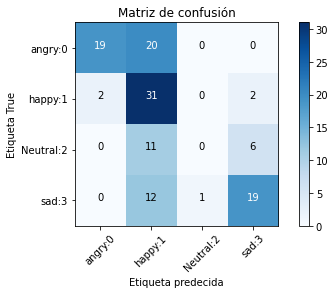

In [11]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')

========================================
